# Исследование объявлений о продаже квартир

Для исследования предоставлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Задача — установить параметры, которые позволят определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Цель исследования

1. Определить рыночную стоимость объектов недвижимости.
2. Построить автомитизированную систему, которая отследит аномалии и мошенническую деятельность.
3. Установить, какие факторы влияют на ценообразование стоимости квартир.

### Ход исследования

Данные о недвижимости получим из файла '/datasets/real_estate_data.csv' О качестве данных ничего не известно. Поэтому перед тем как приступать к целям исследования, понадобится обзор данных.

Проверим данные на ошибки, оценим их влияние на ислледование. На этапе предобработки поищем возможности исправить ошибки в данных, которые не приведут к искажению конечного результата. Далее создадим необходимые столбцы и приступим к проведению исследования.

Таким образом, проведение исследования пройдет в семь этапов:

- обзор данных
- предобработка данных
- расчеты и добавления результатов в таблицы
- проведение анализа для Ленинградской области
- проведение анализа для Санкт-Петербурга
- оценка факторов, влияющих на стоимость квартир
- подведение итогов

## Обзор данных

Для знакомства с данными откроем файл и выведем:
    
1. Первые 20 строк таблицы

2. Общую информацию по таблице

3. Гистограммы для всех числовых столбцов таблицы


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [2]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

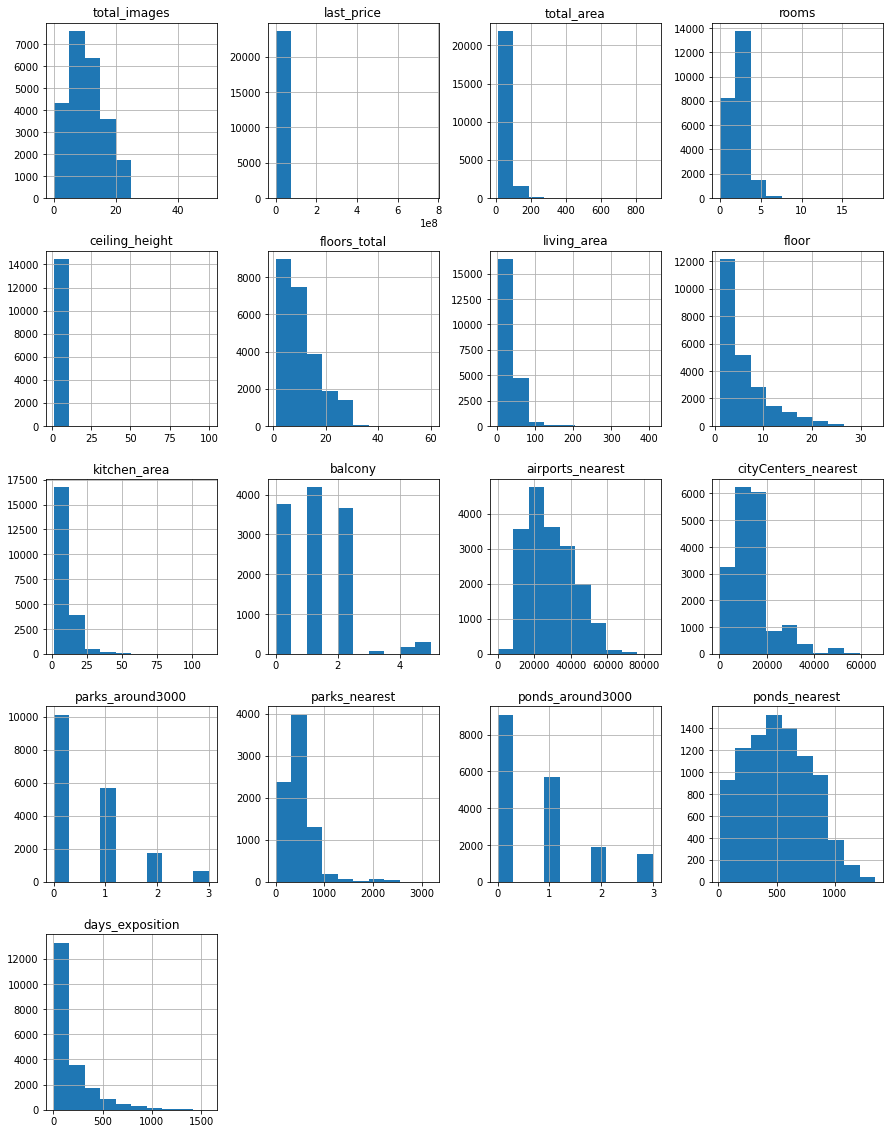

In [4]:
data.hist(figsize=(15, 20));

Ряд графиков получился непоказательным. Выведем их с другими параметрами:

<AxesSubplot:>

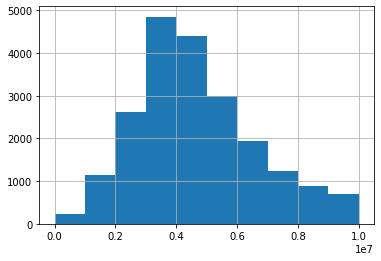

In [5]:
data['last_price'].hist(range=(0,1e7))

<AxesSubplot:>

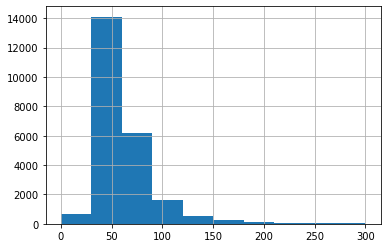

In [6]:
data['total_area'].hist(range=(0,300))

<AxesSubplot:>

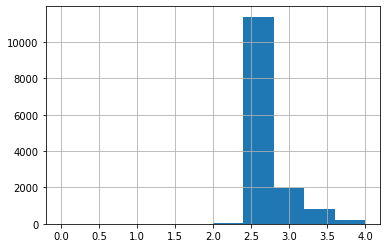

In [7]:
data['ceiling_height'].hist(range=(0,4))

__Вывод:__ Пердставлены табличные данные с 23699 записями по продаже недвижимости. Данные включают в себя как описание характеристики недвижимости (площадь, высоту потолков, наличие балконов и т.д.), так и картографические характеристики: растояние до центра города, парков, прудов и т.д. 

Данные представленны неравномерно, требуют предварительной обработки.

## Предобработка данных

### Пропуски данных

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [3]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Пропущенные данные есть в 14 столбцах:
* ceiling_height (9195) - высота потолков
* floors_total (86) - количество этажей
* living_area (1903) - жилая площадь
* is_apartment (20924) - является ли сдаваемая квартира аппартаментами
* kitchen_area (2278) - площадь кухни
* balcony (11519) - наличие балкона
* locality_name (49) - название населенного пункта
* airports_nearest (5542) - расстояние до ближайшего аэропорта
* cityCenters_nearest (5519) - расстояние до центра города
* parks_around3000 (5518) - число парков в радиусе 3 км
* parks_nearest (15620) - расстояние до ближайшего парка
* ponds_around3000 (5518) - число прудов в радиусе 3 км
* ponds_nearest (14589) - расстояние до ближайшего пруда
* days_exposition (3181) -  сколько дней было размещено объявления


__Постараемся заполнить пропуски__

1) Пропуски в столбцах __floors_total__ и __locality_name__ не восстановимы. Общее количество этажей в здании может зависеть от слишком большого количества параметров (тип поселения, год постройки и т.д.), название населенного пункта тем более может быть любым из представленных в Ленинградской области. Но пропуски в этих столбцах малочисленны (86 и 49 соответственно), их можно отбросить без вреда для общей выборки.

In [10]:
data = data.dropna(subset=['floors_total','locality_name'])

2) Пропуски в столбцах __airports_nearest__, __parks_nearest__ и __ponds_nearest__ заполнить невозможно. Это картографические данные, попытка заполнить их средними или медианой приведет к значительным искажениям в выборке.

3) Пропуски в столбце __cityCenters_nearest__ можно заполнить медианными данными по каждому населенному пункту, исходя из предположения, что в среднем расстояние в каждом населенном пункте до центра будет относительно одинаковым

In [11]:
for i in data['locality_name'].unique():
    data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna((data.loc[data['locality_name'] == i,'cityCenters_nearest']).median())
print(data['cityCenters_nearest'].isna().sum())

0


4) В столбцах __ponds_around3000__ и __parks_around3000__ отсутствие показателей можно интерпретировать как отсутствие парков или прудов ближе 3 км от квартиры, а следовательно - заполнить пропуски нулями.

In [12]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [13]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

5) В столбце __balcony__ отсутствие показателя скорее всего также говорит, что в квартире просто нет балкона. Заполним пропуски нулями.

In [14]:
data['balcony'] = data['balcony'].fillna(0)

6) В столбце __is_apartment__ отсутствие показателя скорее всего говорит, что квартира не является аппартаментами. Заполним пропуски соответствующим значением.

In [15]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [16]:
data['is_apartment'] = data['is_apartment'].fillna(False)

7) Пропуски в столбцах __kitchen_area__ и __living_area__ можно постараться сократить, вычитая противоположный показатель из общей площади квартиры (пропусков в столбце __total_area__ нет). После чего посмотреть количество оставшихся пропусков в этих двух показателях.

In [17]:
data['living_area'] = data['living_area'].fillna(data['total_area'] - data['kitchen_area'])

In [18]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] - data['living_area'])

In [19]:
data['kitchen_area'].isna().sum()

1427

In [20]:
data['living_area'].isna().sum()

1427

Таким образом в обоих столбцах остались незаполненными данные по 1427 предложениям (до корректировки остальных данных), в которых одновременно не указаны как жилая площадь так и площадь кухни

8) Высота потолков, указанная в столбце __ceiling_height__, обычно зависит от типа здания, а значит может быть рассчитана по медианному значению высоты потолков для квартир, расположенных в зданиях с одинаковым количеством этажей.

In [21]:
for i in data['floors_total'].unique(): # для каждого здания с одинаковым количеством этажей
    data['ceiling_height'] = data['ceiling_height'].fillna((data.loc[ data['floors_total'] == i,'ceiling_height']).median())
print(data['ceiling_height'].isna().sum())

0


8) Столбец __days_exposition__ вызывает вопросы по заполнению. Оставляем пропуски, поскольку возможно, что квартиры еще не проданы.

In [22]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1427
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1427
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest         0
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

__Вывод:__ удалось избавиться почти от всех пропусков:
* не удалось до конца восстановить пропуски в данных по размеру жилой площади / площади кухни - эти пропуски связаны друг с другом: там, где было возможно, пропуски были восстановлены с учетом данных по общей площади, но в 1427 случаях этого сделать оказалось невозможно (одновременно отсутсвуют данные как по кухне так и по жилой площади)
* также не возможно уточнить данные по растоянию до ближайших парков, прудов и аэропортов (картографические данные)
* пропуски в столбце с количеством выставленных дней также оставляем.

_Причинами в подобных пропусках данных могли быть а) человеческий фактор (невнимательность, нежелание заполнять те данные, которые кажутся лишними), б) технические ошибки в системе (при размещении объявления система не проверяет обязательное заполнение всех полей, технические сбои при выгрузке данных), в) отсутствие правильно заданных картографических показателей в системе._

### Типы данных

In [23]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Рассмотрим типы данных в столбцах. Данные в столбце __first_day_exposition__ меняем на datetime64[ns]. По оставшимся столбцам стоит изменить тип данных с float на int в трех случаях - цена, общее количество этажей и количество балконов, поскольку эти данные могут быть выражены только целыми числами. Остальные данные представленны в корректных типах.

In [24]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [25]:
data['last_price'] = data['last_price'].astype(int)

In [26]:
data['floors_total'] = data['floors_total'].astype(int)

In [27]:
data['balcony'] = data['balcony'].astype(int)

In [28]:
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

__Итог:__ Типы данных приведены в соответствие.

### Уникальные значения

Уникальные значения представлены в столбце __locality_name__. Проверим их на неявные дубликаты.

Для начала отсортируем по алфавиту и выведем все уникальные значения.

In [29]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [30]:
data['locality_name'].sort_values().nunique()

364

Для начала удалим дубликаты, которые появились от разного написания (например "поселок" и "посёлок") или от расширения названия (например, "поселок городского типа" или "поселок станции")

In [31]:
data['locality_name'] = data['locality_name'].replace({'городской посёлок': 'поселок', 'коттеджный посёлок': 'поселок', 'посёлок': 'поселок', 'посёлок городского типа': 'поселок', 'посёлок при железнодорожной станции': 'поселок станции', 'посёлок станции': 'поселок станции', 'садоводческое некоммерческое товарищество': 'садовое товарищество'}, regex=True)
data['locality_name'] = data['locality_name'].replace({'городской поселок': 'поселок', 'коттеджный поселок': 'поселок', 'поселок городского типа': 'поселок', 'поселок при железнодорожной станции': 'поселок станции',' садоводческое некоммерческое товарищество': 'садовое товарищество'}, regex=True)
# двойная запись, поскольку если включить все в один словарь, то изначально оставлял ряд названий
# (выдавал при первом запуске 332 наименования, которые сводил к 319 при втором запуске)

In [32]:
data['locality_name'].sort_values().nunique()

319

In [33]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

__Вывод:__ Удаление неявных дубликатов привело к уменьшению списка уникальных значений с 364 до 319.

### Выбивающиеся значения

Проанализируем данные по колонкам, чтобы найти выбивающиеся значения. Сразу опустим картографические данные (расстояния до аэропорта, центра, парков и прудов) - эти данные просто фиксируют некоторую данность, также опускаем данные по конкретному этажу, количеству балконов и количеству комнат.



1) Для начала рассмотрим данные по высоте потолков

In [34]:
data['ceiling_height'].describe() 

count    23565.000000
mean         2.743804
std          0.989875
min          1.000000
25%          2.600000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

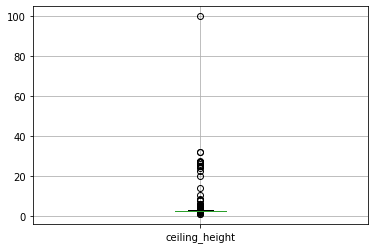

In [35]:
data.boxplot(column='ceiling_height')

Удалим выбросы (высота потолков меньше 2,2 м и больше 3,5 м), также учтем, что данные больше 22 могли быть записаны некорректно (например, 27 вместо 2,7)

In [36]:
data = data[((data['ceiling_height'] > 2.2) & (data['ceiling_height'] <= 3.5)) | (data['ceiling_height'] >= 22)]
data.loc[data['ceiling_height'] >= 22, 'ceiling_height'] = data['ceiling_height'] / 10
data = data[data['ceiling_height'] != 10]

Проверим данные и убедимся, что данные корректны

<AxesSubplot:>

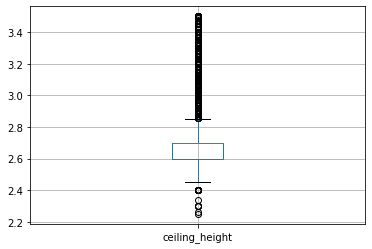

In [37]:
data.boxplot(column='ceiling_height')

In [38]:
data['ceiling_height'].describe()  

count    23269.000000
mean         2.702927
std          0.174170
min          2.250000
25%          2.600000
50%          2.700000
75%          2.700000
max          3.500000
Name: ceiling_height, dtype: float64

2) Теперь рассмотрим данные по ценам

In [39]:
data['last_price'].describe()

count    2.326900e+04
mean     6.353567e+06
std      1.037513e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      7.630000e+08
Name: last_price, dtype: float64

(0.0, 13000000.0)

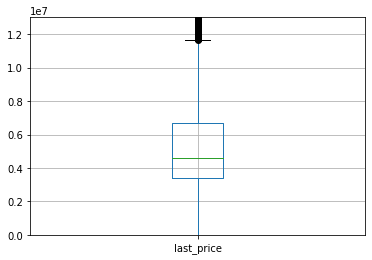

In [40]:
data.boxplot(column='last_price')
plt.ylim(0, 13000000)

Понимая, что могут быть представлены цены на элитную недвижимость, уберем только самое выпадающеее значение - более 5 млн. Также удалим как ошибочное значение меньше 400 тыс.

In [41]:
data = data[(data['last_price'] < 500000000) & (data['last_price'] > 12190)]

<AxesSubplot:>

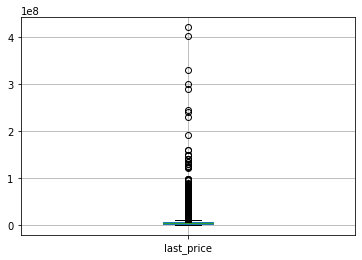

In [42]:
data.boxplot(column='last_price')

In [43]:
data['last_price'].describe()  

count    2.326700e+04
mean     6.321319e+06
std      9.112767e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      4.200000e+08
Name: last_price, dtype: float64

3) Точно также рассмотрим данные по общему количеству этажей в зданиях (учитывая, что максимальное количество этажей в Санкт-Петербурге и области - 37)


In [44]:
data['floors_total'].describe()

count    23267.000000
mean        10.738686
std          6.600665
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

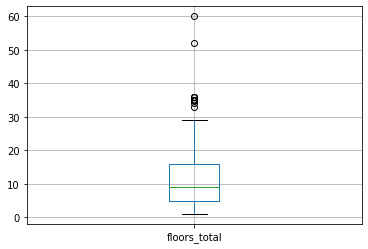

In [45]:
data.boxplot(column='floors_total')

Удалим выбросы

In [46]:
data = data[data['floors_total'] < 40]

<AxesSubplot:>

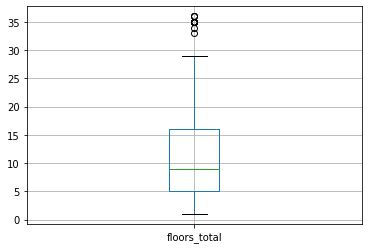

In [47]:
data.boxplot(column='floors_total')

In [48]:
data['floors_total'].describe()

count    23265.000000
mean        10.734795
std          6.587489
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

4) Данные по общей площади, площади кухни и жилой площади очистим от выбросов в соответствии с данными графиков, т.к. для нашего исследования это редкие выбивающиеся из общей картины уникальные объекты, по которым необходимо проводить отдельную работу.

In [49]:
data['total_area'].describe()

count    23265.000000
mean        59.511912
std         33.578897
min         12.000000
25%         40.000000
50%         51.800000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

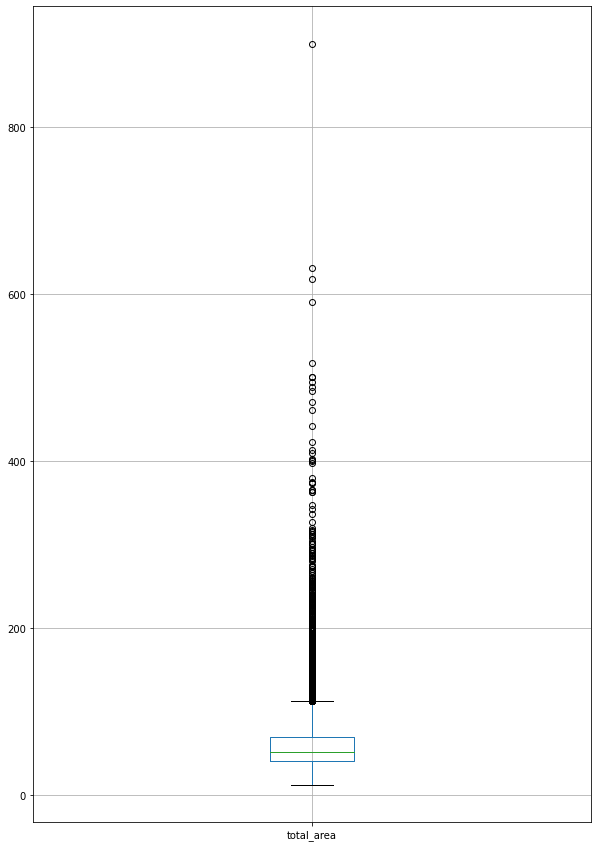

In [50]:
data.boxplot(column='total_area', figsize=(10,15))

In [51]:
data['kitchen_area'].describe()

count    21853.000000
mean        10.751572
std          6.415051
min          0.000000
25%          7.000000
50%          9.200000
75%         12.000000
max        134.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

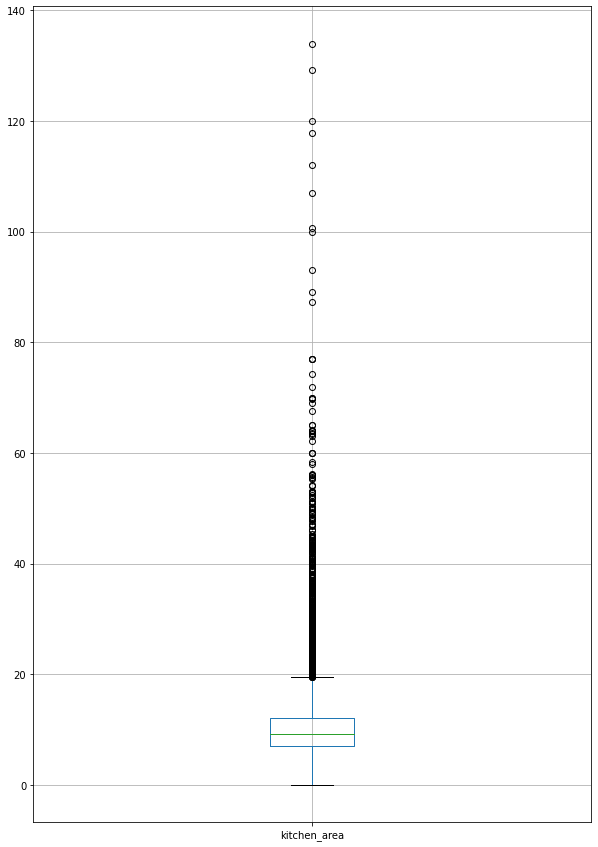

In [52]:
data.boxplot(column='kitchen_area', figsize=(10,15))

In [53]:
data['living_area'].describe()

count    21853.000000
mean        34.384406
std         21.857557
min          2.000000
25%         18.700000
50%         30.000000
75%         42.300000
max        571.000000
Name: living_area, dtype: float64

<AxesSubplot:>

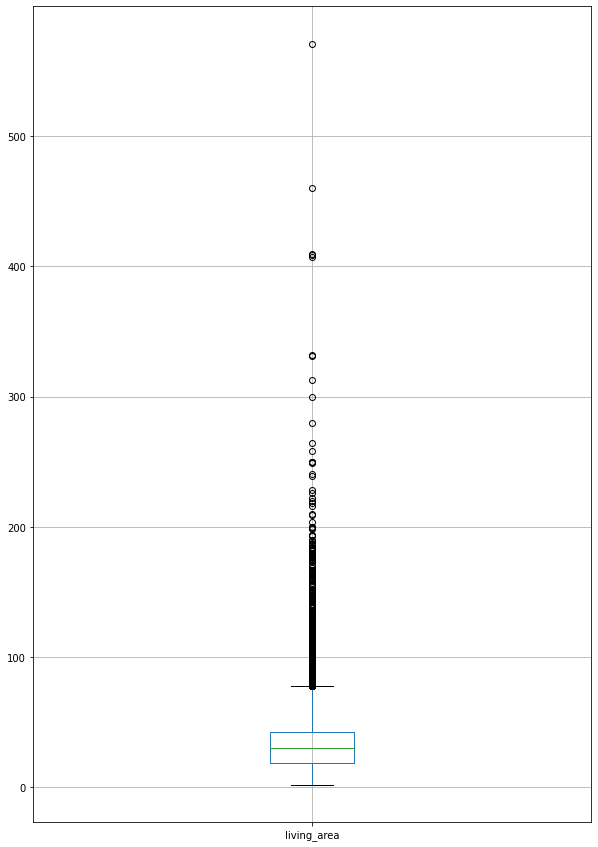

In [54]:
data.boxplot(column='living_area', figsize=(10,15))

In [55]:
data = data[data['total_area'] < 400]
data = data[data['kitchen_area'] < 80]
data = data[data['living_area'] < 200]

<AxesSubplot:>

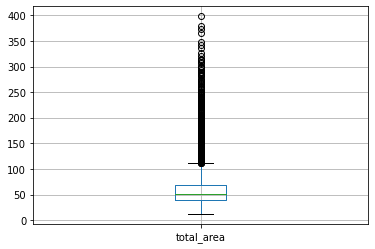

In [56]:
data.boxplot(column='total_area')

<AxesSubplot:>

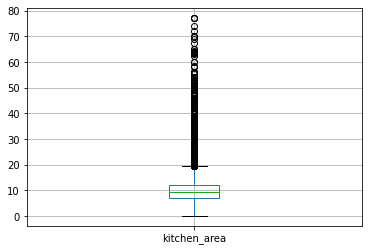

In [57]:
data.boxplot(column='kitchen_area')

<AxesSubplot:>

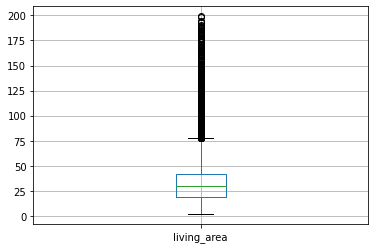

In [58]:
data.boxplot(column='living_area')

In [59]:
data['total_area'].describe()

count    21814.000000
mean        58.915970
std         29.933613
min         12.000000
25%         40.000000
50%         51.700000
75%         68.900000
max        398.000000
Name: total_area, dtype: float64

In [60]:
data['kitchen_area'].describe()

count    21814.000000
mean        10.670886
std          5.934677
min          0.000000
25%          7.000000
50%          9.200000
75%         12.000000
max         77.000000
Name: kitchen_area, dtype: float64

In [61]:
data['living_area'].describe()

count    21814.000000
mean        34.021545
std         19.566440
min          2.000000
25%         18.700000
50%         30.000000
75%         42.200000
max        199.000000
Name: living_area, dtype: float64

__Вывод:__ Удаление выбивающихся знанчений привело к сокращению разброса данных и исключению из исследования уникальных ситуация, требующих оттдельного рассмотрения.

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21814 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21814 non-null  int64         
 1   last_price            21814 non-null  int64         
 2   total_area            21814 non-null  float64       
 3   first_day_exposition  21814 non-null  datetime64[ns]
 4   rooms                 21814 non-null  int64         
 5   ceiling_height        21814 non-null  float64       
 6   floors_total          21814 non-null  int64         
 7   living_area           21814 non-null  float64       
 8   floor                 21814 non-null  int64         
 9   is_apartment          21814 non-null  bool          
 10  studio                21814 non-null  bool          
 11  open_plan             21814 non-null  bool          
 12  kitchen_area          21814 non-null  float64       
 13  balcony         

Теперь убедимся, что в данных не осталось явных дубликатов.

In [63]:
data[data.duplicated()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Дубликатов не обнаружено.

__Вывод:__ Проведена предобработка данных. Убраны пропуски в тех случаях, когда это было возможно, типы данных приведены в логическое соответствие, удалены неявные дубликаты и выбивающиеся значения.

## Добавление необходимых столбцов в таблицу

Внесем в таблицу новые столбцы с дополнительными данными

1) Цена одного квадратного метра

In [64]:
data['price_m2'] = data['last_price'] / data['total_area']

2) День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [65]:
data['day_of_week_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek

3) Месяц публикации объявления

In [66]:
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

4) Год публикации объявления

In [67]:
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

5) Тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [68]:
# введем функцию для категоризации квартир по этажам
def floor_t(row):
    if row['floor'] == 1:
        return "Первый"
    elif row['floor'] == row['floors_total'] & row['floors_total'] !=1:
        return "Последний"
    return "Другой"

# внесем данные в новый столбец
data['floor_type'] = data.apply(floor_t, axis = 1)

6) Расстояние до центра города в километрах

In [69]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21814 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            21814 non-null  int64         
 1   last_price              21814 non-null  int64         
 2   total_area              21814 non-null  float64       
 3   first_day_exposition    21814 non-null  datetime64[ns]
 4   rooms                   21814 non-null  int64         
 5   ceiling_height          21814 non-null  float64       
 6   floors_total            21814 non-null  int64         
 7   living_area             21814 non-null  float64       
 8   floor                   21814 non-null  int64         
 9   is_apartment            21814 non-null  bool          
 10  studio                  21814 non-null  bool          
 11  open_plan               21814 non-null  bool          
 12  kitchen_area            21814 non-null  float6

In [71]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day_of_week_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,Другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,Первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,Другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,Другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.70,12,14.4,5,False,...,NaN,0.0,NaN,55.0,95065.789474,0,9,2018,Другой,12.0


## Исследовательский анализ данных

### Изучение параметров объектов

__Общая площадь__

Наблюдается нормальное распределение с медианой, приходящейся на 50 кв.м

<AxesSubplot:>

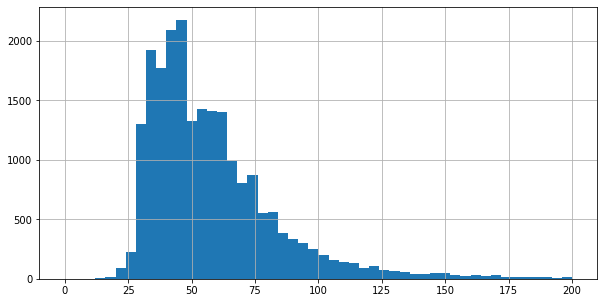

In [72]:
data['total_area'].hist(bins=50, figsize=(10,5), range=(0,200))

__Жилая площадь__

Наблюдается провал на значениях 24-25 кв.м

<AxesSubplot:>

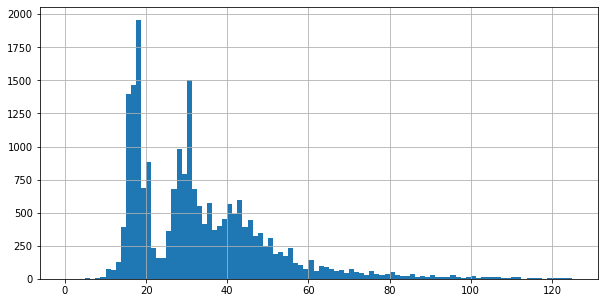

In [73]:
data['living_area'].hist(bins=100, figsize=(10,5), range=(0,125))

__Площадь кухни__

"Провал" на значении 7 кв.м

<AxesSubplot:>

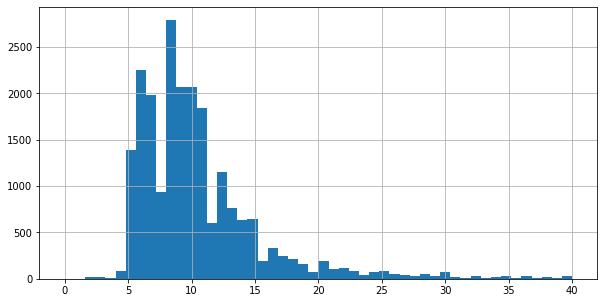

In [74]:
data['kitchen_area'].hist(bins=50, figsize=(10,5), range=(0,40))

__Цена__

Нормальное распределение с медианной ценой - 4,6 млн

<AxesSubplot:>

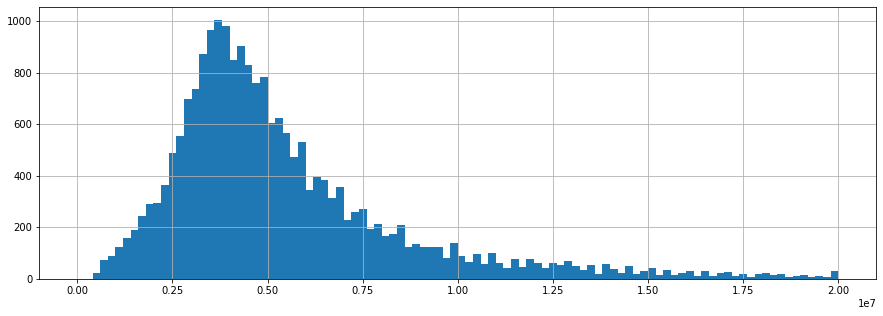

In [75]:
data['last_price'].hist(bins=100, figsize=(15,5), range=(0,20000000))

__Количество комнат__

В подавляющем большинстве представлено 1-, 2-, 3-комнатные квартиры

<AxesSubplot:>

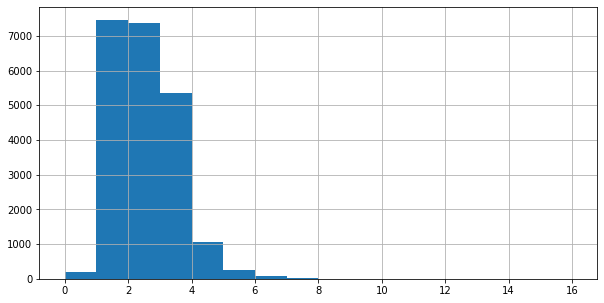

In [76]:
data['rooms'].hist(bins=16, figsize=(10,5))

__Высота потолков__

Высота потолков тяготеет к общероссийскому стандарту - 2,7 м

<AxesSubplot:>

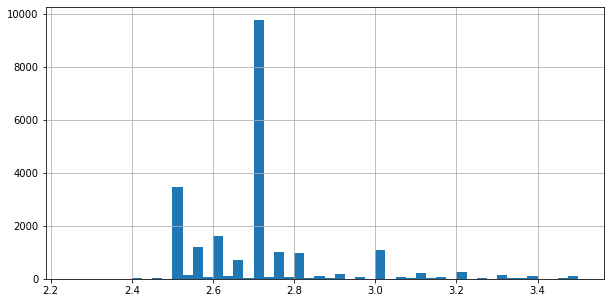

In [77]:
data['ceiling_height'].hist(bins=50, figsize=(10,5))

__Этаж квартиры__

С увеличением этажа - количество предложенных квартир идет на спад.

<AxesSubplot:>

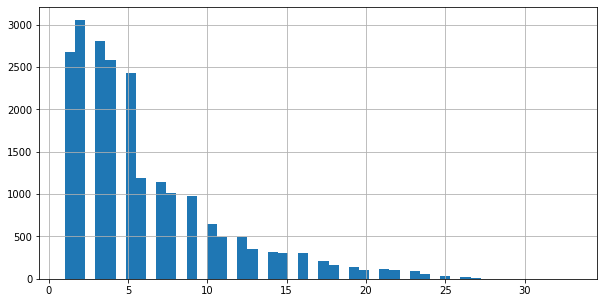

In [78]:
data['floor'].hist(bins=50, figsize=(10,5))

__Тип этажа__

В большинстве представлены квартиры "не на первом и не на последнем" этажах

<AxesSubplot:>

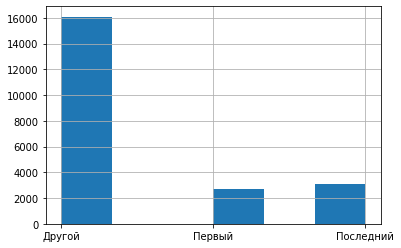

In [79]:
data['floor_type'].hist(bins=6)

__Количество этажей в здании__

В подавляющем большинстве - стандартная застройка - до 12 этажей, тяготеющая к застройке 5 этажными и 9-этажными зданиями 

<AxesSubplot:>

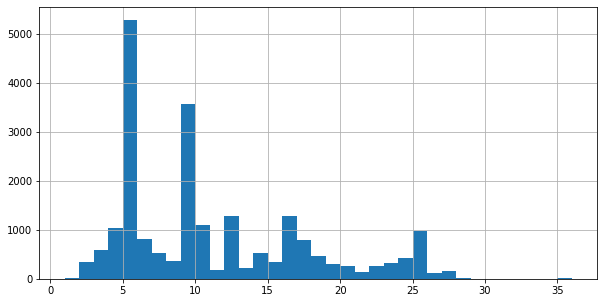

In [80]:
data['floors_total'].hist(bins=35, figsize=(10,5))

__Удаленность от центра__

На графике выделяется отдельный блок, который появился за счет заполнения пропусков медианным значением, но видно, что именно к нему тяготеет расположение большинства предложенных квартир.

<AxesSubplot:>

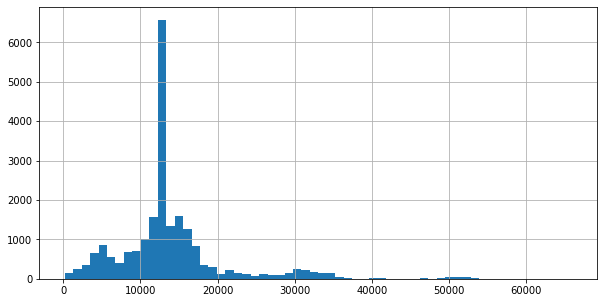

In [81]:
data['cityCenters_nearest'].hist(bins=60, figsize=(10,5))

__Удаленность от аэропрорта__

В целом получилось равномерное распределение по удаленности от аэропорта

<AxesSubplot:>

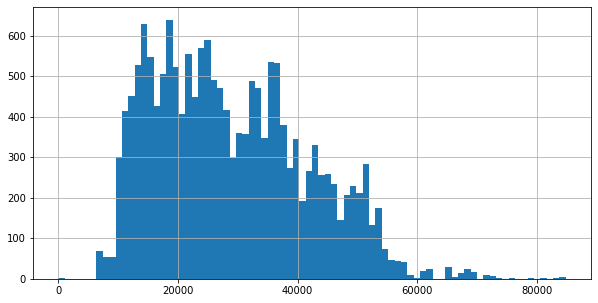

In [82]:
data['airports_nearest'].hist(bins=80, figsize=(10,5))

__Ближайшие парки__

Видно, что в тех случаях, когда данные указаны, парки находятся достаточно близко - большинство - на растоянии менее 1,5 км

<AxesSubplot:>

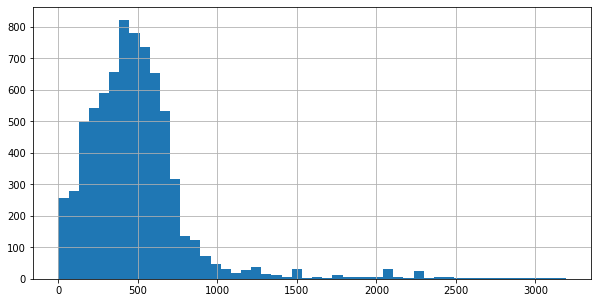

In [83]:
data['parks_nearest'].hist(bins=50, figsize=(10,5))

__Публикации объявений по дням недели__

В будни объявления публикуются интенсивнее. Несколько выделяются вторник и четверг.

<AxesSubplot:>

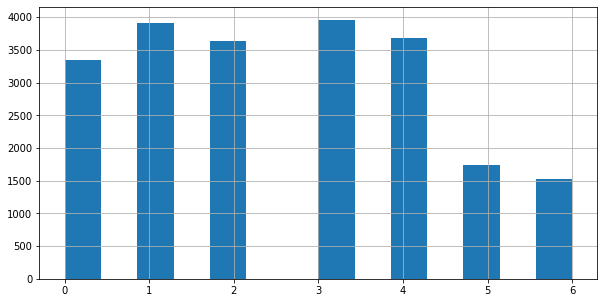

In [84]:
data['day_of_week_exposition'].hist(bins=14, figsize=(10,5))

__Публикация объявлений по месяцам__

Самая активная публикация идет, начиная с февраля до апреля. Затем возникает летнее затишье, после чего интенсивность публикаций нарастает до ноября включительно с перерывом на декабрь и январь.

<AxesSubplot:>

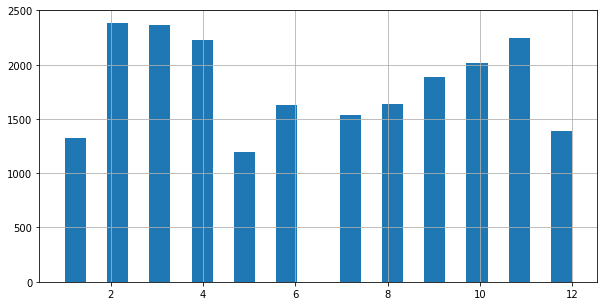

In [85]:
data['month_exposition'].hist(bins=24, figsize=(10,5))

### Скорость продажи квартир

Изучим скорость продажи квартир

<AxesSubplot:>

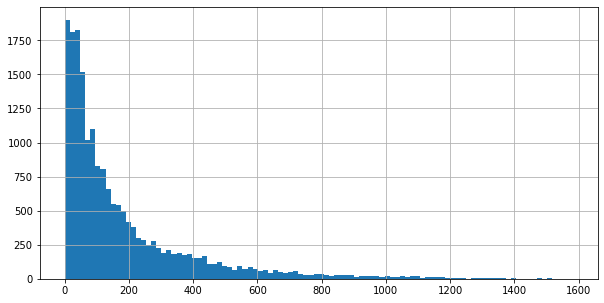

In [86]:
data['days_exposition'].hist(bins=100, figsize=(10,5))

In [87]:
data['days_exposition'].describe()

count    18824.000000
mean       183.703145
std        220.972081
min          1.000000
25%         44.000000
50%        100.000000
75%        236.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем объявления о продаже недвижимости срабатывают в течение 184 дней с медианным значением ровно в 100 дней.

По скорости продажи квартир объявления можно сгрупировать следующим образом:
* быстро - до 44 дней
* умеренно быстро - от 44 до 100 дней
* средне - от 100 до 236 дней
* медленно - более 236 дней

### Факторы, влияющие на стоимость

Построим графики, которые покажут зависимость изменения цены от ряда параметров

__Зависимость цены от общей площади__

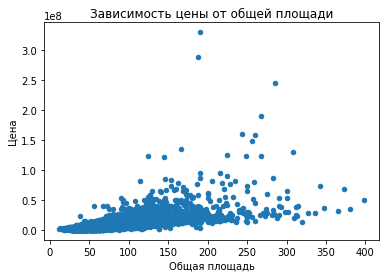

In [88]:
data.plot(x='total_area', y='last_price', kind='scatter')
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.show()

In [89]:
data['last_price'].corr(data['total_area'])

0.6665736340996088

Зависимость довольно выраженная - при повышении общей площади увеличивается цена.

__Зависимость цены от жилой площади__

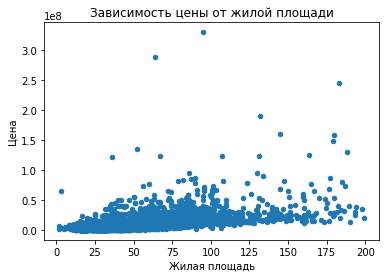

In [90]:
data.plot(x='living_area', y='last_price', kind='scatter')
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.show()

In [91]:
data['last_price'].corr(data['living_area'])

0.5737349336147977

Менее выраженная корелляция, тем не менее - сопоставимая с предыдущими данными (при повышении площади увеличивается цена).

__Зависимость цены от площади кухни__

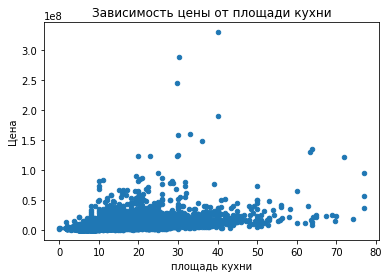

In [92]:
data.plot(x='kitchen_area', y='last_price', kind='scatter')
plt.title('Зависимость цены от площади кухни')
plt.xlabel('площадь кухни')
plt.ylabel('Цена')
plt.show()

In [93]:
data['last_price'].corr(data['kitchen_area'])

0.4800257378131868

Еще менее выраженная корелляция, тем не менее - общий тренд остается прежним (при повышении площади увеличивается цена).

__Зависимость цены от количества комнат__

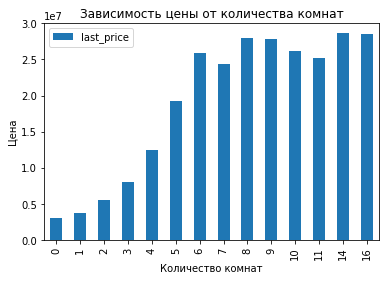

In [94]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar')
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()

In [95]:
data['last_price'].corr(data['rooms'])

0.3948673174024988

Корреляция присутствует, но уже менее выраженно - при увеличении количества комнат до 6 цена растет пропорционально увеличению,  после рост цены резко замедляется.

__Зависимость цены от типа этажа__

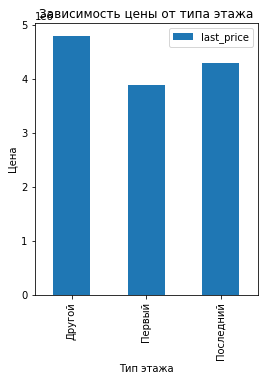

In [96]:
data.pivot_table(index='floor_type',values='last_price', aggfunc='median').plot(y='last_price', kind='bar', figsize=(4,5))
plt.title('Зависимость цены от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.show()

"Первый" этаж оказывается дешевле по сравнению с другими этажами. "Последний" занимает срединную позицию между "первым" и "другими".

__Зависимость цены от дня выставления объявления__

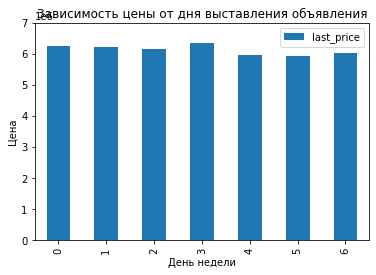

In [97]:
data.pivot_table(index='day_of_week_exposition',values='last_price').plot(y='last_price', kind='bar', ylim=(0,7000000))
plt.title('Зависимость цены от дня выставления объявления')
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.show()

In [98]:
data['last_price'].corr(data['day_of_week_exposition'])

-0.012743801118172351

Корреляция выражена слабо - фактически, говорить о том, что цена зависит от дня недели нельзя, хотя можно уточнить, что более дорогостоящие объявления делаются ближе к началу недели.

__Зависимость цены от месяца выставления объявления__

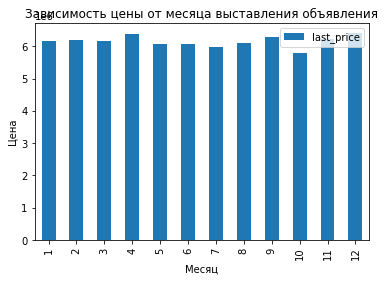

In [99]:
data.pivot_table(index='month_exposition',values='last_price').plot(y='last_price', kind='bar')
plt.title('Зависимость цены от месяца выставления объявления')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

In [100]:
data['last_price'].corr(data['month_exposition'])

-0.001481190536156116

Корреляция не выражена. Цена объявления не зависит от месяца подачи объявления.

__Зависимость цены от года выставления объявления__

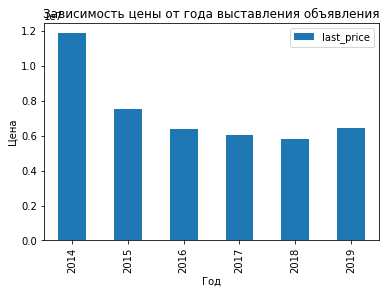

In [101]:
data.pivot_table(index='year_exposition',values='last_price').plot(y='last_price', kind='bar')
plt.title('Зависимость цены от года выставления объявления')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

In [102]:
data['last_price'].corr(data['year_exposition'])

-0.041246214225904305

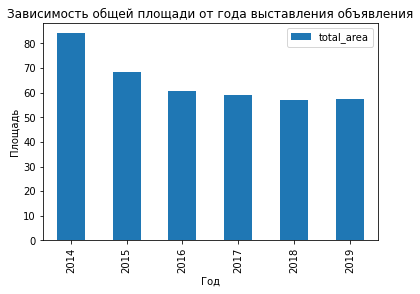

In [103]:
data.pivot_table(index='year_exposition',values='total_area').plot(y='total_area', kind='bar')
plt.title('Зависимость общей площади от года выставления объявления')
plt.xlabel('Год')
plt.ylabel('Площадь')
plt.show()

In [104]:
data['total_area'].corr(data['year_exposition'])

-0.08552614375381781

Корреляция слабая, но видно, что в 2014 году было наибольшее количество объявлений с высокой ценой и большой площадью квартир, в последующие годы на сервис выставляли квартиры меньшей площадью, соответственно - по меньшей цене, однако можно увидеть, что падеине цены происходило быстрее, чем уменьшение площади выставляемых на продажу объектов недвижимости.

__Вывод:__ очевидно, что на цену влияет площадь (будь это общая, жилая площаь или площадь кухни, также цена растет с увеличением количества комнат (но до определенного количества - граница - 6 комнат), а дни и месяцы размещения объявлений на цену влияют не сильно. Отдельно необходимо отметить, что цена первого этажа сильно уступает другим, следом идет последний этаж, а самые дорогие квартиры находятся одновременно не на первом и не на последнем этажах. И что самые дорогие объявления за объекты недвижимости с большой площадью были размещены на сервисе в первый год его работы.

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Выделим 10 населенных пунктов (с исключением Санкт-Петербурга) с наибольшим числом объявлений и посчитаем среднюю стоимость квадратного метра в них.

In [105]:
median_price_m2 = data.pivot_table(index = 'locality_name', values = 'price_m2',
                          aggfunc = {'price_m2': 'median', 'locality_name': 'count'})

median_price_m2 = median_price_m2.rename(columns={'locality_name': 'total_count', 'price_m2': 'price_m2_median'})

top_10 = median_price_m2.loc[median_price_m2.index != 'Санкт-Петербург']

top_10 = top_10.sort_values(by='total_count', ascending=False).head(10)

top_10

,total_count,price_m2_median
locality_name,,
поселок Мурино,512,86311.913573
поселок Шушары,407,77272.727273
Всеволожск,369,65789.473684
Пушкин,340,99993.589744
Колпино,328,74723.748474
поселок Парголово,302,91579.708641
Гатчина,295,67924.528302
деревня Кудрово,267,92297.899427
Петергоф,197,81993.569132


In [106]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,14515,5500000
поселок Мурино,512,3400000
поселок Шушары,407,3950000
Всеволожск,369,3450000
Пушкин,340,5187319
Колпино,328,3600000
поселок Парголово,302,4100000
Гатчина,295,3100000
деревня Кудрово,267,3700000


Выделим населенные пункты с самой высокой и самой низкой средней ценой квадратного метра из топ-10.

In [107]:
top_10.query('price_m2_median == price_m2_median.max()')

,total_count,price_m2_median
locality_name,,
Пушкин,340,99993.589744


In [108]:
top_10.query('price_m2_median == price_m2_median.min()')

,total_count,price_m2_median
locality_name,,
Выборг,197,58407.079646


Отдельно выделим населенные пункты с самой высокой и самой низкой средней ценой квадратного метра из всех представленных.

In [109]:
median_price_m2.query('price_m2_median == price_m2_median.max()')

,total_count,price_m2_median
locality_name,,
поселок Репино,2,127678.571429


In [110]:
median_price_m2.query('price_m2_median == price_m2_median.min()')

,total_count,price_m2_median
locality_name,,
деревня Старополье,1,10368.663594


Для сравнения приведем среднюю цену за квадратный метр в Санкт-Петербурге.

In [111]:
median_price_m2.loc[median_price_m2.index == 'Санкт-Петербург']

,total_count,price_m2_median
locality_name,,
Санкт-Петербург,14515,104519.774011


__Вывод:__ Средние цены за квардратный метр в 10 населенных пунктах с наибольшим количеством объявлений ниже, чем в Санкт-Петербурге. Наименьшая цена в Выборге (58407), наибольшая в Пушкине (99993). При этом самая маленькая цена за квадратный метр в деревне Старополье (10368), а самая высокая в поселке Репино (127678), при этом средняя цена за квадратный метр в поселке Репино почти на 24 тыс больше, чем в Санкт-Петербурге.

### Средняя цена каждого километра в Санкт-Петербурге

Выделим среднюю цену каждого километра в Санкт-Петербурге и построим график.

In [112]:
spb_data = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')

In [113]:
spb_data

,last_price
cityCenters_nearest_km,
0.0,3.650482e+07
1.0,1.928368e+07
2.0,1.518119e+07
3.0,1.075912e+07
4.0,1.138292e+07
5.0,1.206497e+07
6.0,1.316380e+07
7.0,1.400133e+07
8.0,9.225026e+06


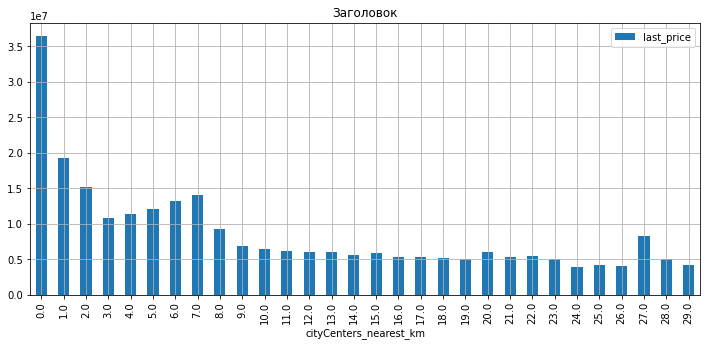

In [114]:
spb_data.plot(grid=True, kind='bar', figsize=(12, 5), title = 'Заголовок');

__Вывод:__ Наибольшая цена в центре города, снижается с каждым километром. В определенный момент видно повышение цены - в районе 7 км от цента (это может говорить о расположении удобных районов), затем повышение цены идет на 27 км (как вариант, опять же - расположение "элитного" района.

## Общий вывод

В рамках исследования архивных данных со сведениями о продаже квартир в Санкт-Петербурге и соседних населенных пунктах можно прийти к следующим выводам:

* В данных представлен разнообразный жилой фонд, который в целом покрывает все варианты жилого фонда Ссанкт-Петербурга и окресностей.
В основной массе представлены 1-3 комнатные квартиры, при этом в большинстве - не на первом и не на последнем этажах - в самой распространенной застройке (здания от 5 до 12 этажей).
* Размещение данных в системе происходило постоянно, в основном по будням, пики размещения приходились на зимне-весенние и осенние месяцы с затишьем летом и зимой (декабрь-январь). По времени размещенные объявления уходили с разной скоростью - быстро (до 44 дней), умеренно быстро (от 44 до 100 дней), средне (от 100 до 236 дней), медленно (более 236 дней).
* Основными факторами, влияющими на стоимость квартиры оказались ее величина (как общей площади, так и кухни или жилой площади) и, в меньшей степени, количество комнат.
* Отдельно необходимо отметить, что изначально к сервису проявлялся больший интерес со стороны пользователей - самые крупные объявления были опубликованы на сервисе в первый год работы.
* По средней цене за квадратный метр Санкт-Петербург оказался не самым дорогим местом, его опережает поселок Репино. Однако среди населенных пунктов с наибольшим количеством объявлений средняя цена за квадратный метр в Санкт-Петербурге наивысшая. Следом за ним идет город Пушкин, а наименьшая цена за квадратный метр из 10 населенных пунктов с наибольшим количеством обхявлений в городе Выборг.
* В Санкт-Петербурге средняя цена за квадратный метр варьируется в зависимости от удаленности от центра. Цена падает с каждым километром, за исключением возрастания на 7 км от центра и небольшим возрастанием на 27 км от центра.
